# Taller – Construyendo el Mundo 3D: Vértices, Aristas y Caras

**Herramientas:** `trimesh`, `matplotlib`, `numpy`

Este notebook carga el modelo `old_rusty_car.glb`, extrae su estructura geométrica y la visualiza con diferentes representaciones: malla sólida, aristas y vértices.

## 1. Instalación de dependencias

In [ ]:
pip install trimesh matplotlib numpy pillow scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 740.3/740.3 kB 12.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 31.3 MB/s  0:00:00 32.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 32.7 MB/s  0:00:004.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.9 MB/s  0:00:007.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 30.2 MB/s  0:00:01 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [matplotlib]0m  9/10 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


## 2. Importaciones

In [10]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import warnings
warnings.filterwarnings('ignore')

# Inline plots
%matplotlib inline
plt.rcParams['figure.facecolor'] = '#0f0f0f'
plt.rcParams['axes.facecolor'] = '#1a1a2e'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = '#718096'
plt.rcParams['ytick.color'] = '#718096'

print('Libraries loaded successfully!')

Libraries loaded successfully!


## 3. Carga del modelo

> **Nota:** Place `old_rusty_car.glb` in the same folder as this notebook or provide the full path below.

In [11]:
MODEL_PATH = 'old_rusty_car.glb'  # adjust path if needed

# trimesh.load returns a Scene when the file has multiple meshes
scene = trimesh.load(MODEL_PATH, force='scene')
print(f'Loaded: {MODEL_PATH}')
print(f'Type  : {type(scene).__name__}')
print(f'Meshes: {len(scene.geometry)}')

Loaded: old_rusty_car.glb
Type  : Scene
Meshes: 3


## 4. Combinación de mallas y estadísticas

In [12]:
# Merge all sub-meshes into a single mesh for easy analysis
mesh = trimesh.util.concatenate(list(scene.geometry.values()))

# --- Structural information ---
n_vertices  = len(mesh.vertices)
n_faces     = len(mesh.faces)
n_edges     = len(mesh.edges_unique)

# Euler characteristic χ = V - E + F  (should be 2 for sphere-like closed mesh)
euler = n_vertices - n_edges + n_faces

print('=' * 40)
print('  MODEL STRUCTURAL INFORMATION')
print('=' * 40)
print(f'  Vertices  (V) : {n_vertices:>10,}')
print(f'  Edges     (E) : {n_edges:>10,}')
print(f'  Faces     (F) : {n_faces:>10,}')
print(f'  Sub-meshes    : {len(scene.geometry):>10}')
print(f'  Euler χ=V-E+F : {euler:>10}')
print(f'  Watertight    : {mesh.is_watertight}')
print(f'  Volume (m³)   : {mesh.volume:.4f}' if mesh.is_watertight else '  Volume (m³)   : N/A (not watertight)')
print('=' * 40)

  MODEL STRUCTURAL INFORMATION
  Vertices  (V) :      3,012
  Edges     (E) :      5,917
  Faces     (F) :      3,132
  Sub-meshes    :          3
  Euler χ=V-E+F :        227
  Watertight    : False
  Volume (m³)   : N/A (not watertight)


## 5. Visualización – Malla sólida (Caras)

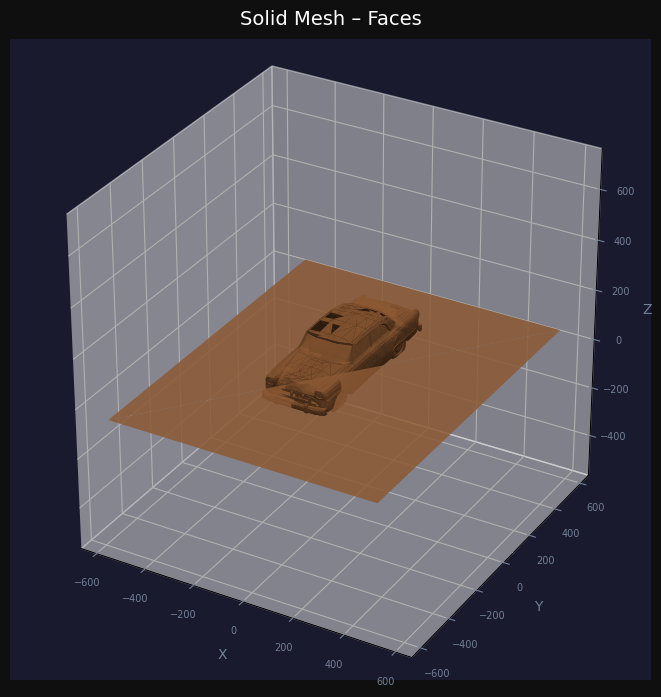

Saved: media/python_solid_faces.png


In [13]:
def plot_mesh_solid(mesh, title='Solid Mesh – Faces', sample_faces=8000):
    """Render a down-sampled solid mesh using Poly3DCollection."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title, color='white', pad=10, fontsize=14)

    # Subsample faces for performance
    idx = np.random.choice(len(mesh.faces), min(sample_faces, len(mesh.faces)), replace=False)
    faces = mesh.vertices[mesh.faces[idx]]

    # Compute face normals for basic shading
    normals = mesh.face_normals[idx]
    # Map normal z-component to brightness
    brightness = np.clip((normals[:, 2] + 1) / 2, 0.2, 1.0)

    colors = np.column_stack([
        brightness * 0.55,
        brightness * 0.35,
        brightness * 0.20,
        np.ones(len(idx)) * 0.85
    ])

    poly = Poly3DCollection(faces, facecolors=colors, edgecolors='none', linewidth=0)
    ax.add_collection3d(poly)

    _set_ax_bounds(ax, mesh)
    ax.set_xlabel('X', color='#718096')
    ax.set_ylabel('Y', color='#718096')
    ax.set_zlabel('Z', color='#718096')
    plt.tight_layout()
    plt.savefig('../media/python_solid_faces.png', dpi=120, bbox_inches='tight',
                facecolor='#0f0f0f')
    plt.show()
    print('Saved: media/python_solid_faces.png')


def _set_ax_bounds(ax, mesh):
    """Center and scale axes to fit the mesh."""
    b = mesh.bounds
    center = (b[0] + b[1]) / 2
    r = np.max(b[1] - b[0]) / 2
    ax.set_xlim(center[0] - r, center[0] + r)
    ax.set_ylim(center[1] - r, center[1] + r)
    ax.set_zlim(center[2] - r, center[2] + r)
    ax.set_box_aspect([1, 1, 1])
    ax.tick_params(colors='#718096', labelsize=7)


plot_mesh_solid(mesh)

## 6. Visualización – Wireframe (Aristas)

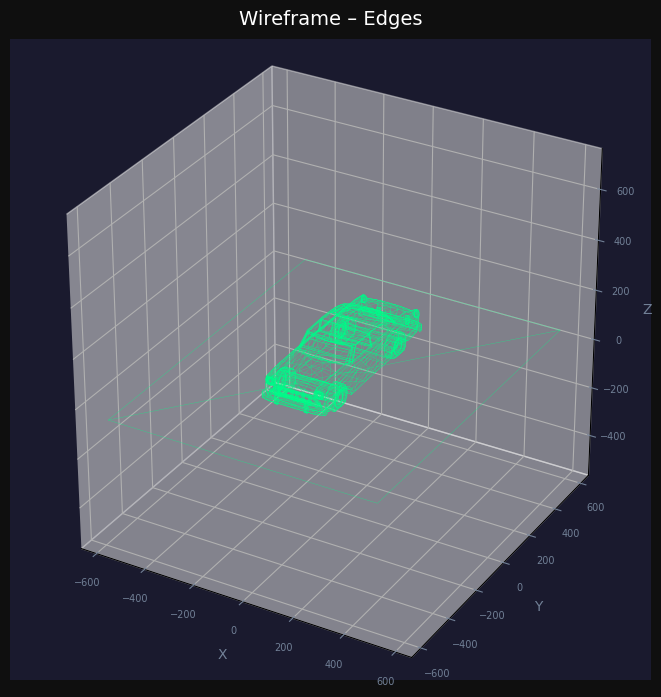

Saved: media/python_wireframe_edges.png


In [14]:
def plot_mesh_wireframe(mesh, title='Wireframe – Edges', sample_edges=15000):
    """Draw unique edges as line segments."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title, color='white', pad=10, fontsize=14)

    # Subsample unique edges
    edges = mesh.edges_unique
    idx = np.random.choice(len(edges), min(sample_edges, len(edges)), replace=False)
    sampled = edges[idx]

    # Build line segments: shape (N, 2, 3)
    segs = mesh.vertices[sampled]  # (N, 2, 3)

    lc = Line3DCollection(segs, colors='#00ff88', linewidths=0.3, alpha=0.6)
    ax.add_collection3d(lc)

    _set_ax_bounds(ax, mesh)
    ax.set_xlabel('X', color='#718096')
    ax.set_ylabel('Y', color='#718096')
    ax.set_zlabel('Z', color='#718096')
    plt.tight_layout()
    plt.savefig('../media/python_wireframe_edges.png', dpi=120, bbox_inches='tight',
                facecolor='#0f0f0f')
    plt.show()
    print('Saved: media/python_wireframe_edges.png')


plot_mesh_wireframe(mesh)

## 7. Visualización – Nube de puntos (Vértices)

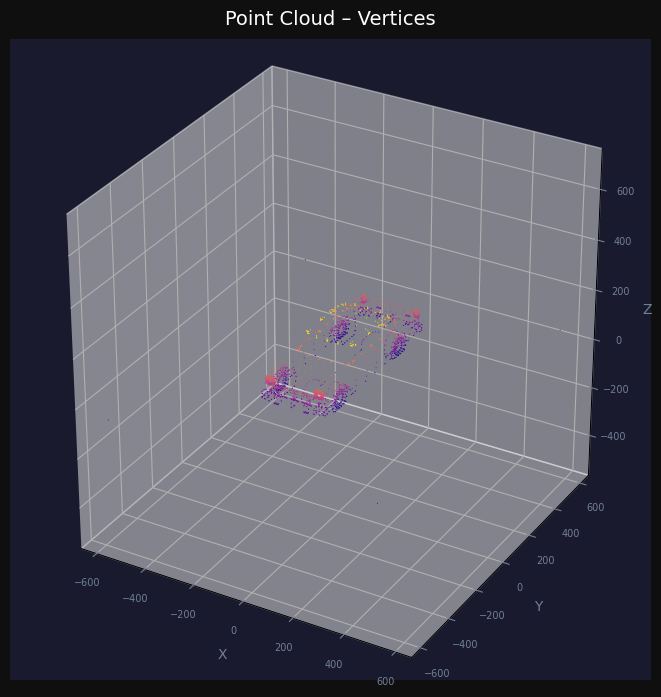

Saved: media/python_vertices_points.png


In [15]:
def plot_mesh_vertices(mesh, title='Point Cloud – Vertices', sample_verts=12000):
    """Scatter-plot a random subset of vertices."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title, color='white', pad=10, fontsize=14)

    idx = np.random.choice(len(mesh.vertices), min(sample_verts, len(mesh.vertices)), replace=False)
    v = mesh.vertices[idx]

    # Color by height (Z axis)
    z_norm = (v[:, 2] - v[:, 2].min()) / (np.ptp(v[:, 2]) + 1e-8)
    colors = plt.cm.plasma(z_norm)

    ax.scatter(v[:, 0], v[:, 1], v[:, 2], c=colors, s=0.6, alpha=0.8, linewidths=0)

    _set_ax_bounds(ax, mesh)
    ax.set_xlabel('X', color='#718096')
    ax.set_ylabel('Y', color='#718096')
    ax.set_zlabel('Z', color='#718096')
    plt.tight_layout()
    plt.savefig('../media/python_vertices_points.png', dpi=120, bbox_inches='tight',
                facecolor='#0f0f0f')
    plt.show()
    print('Saved: media/python_vertices_points.png')


plot_mesh_vertices(mesh)

## 8. Panel comparativo: las tres representaciones

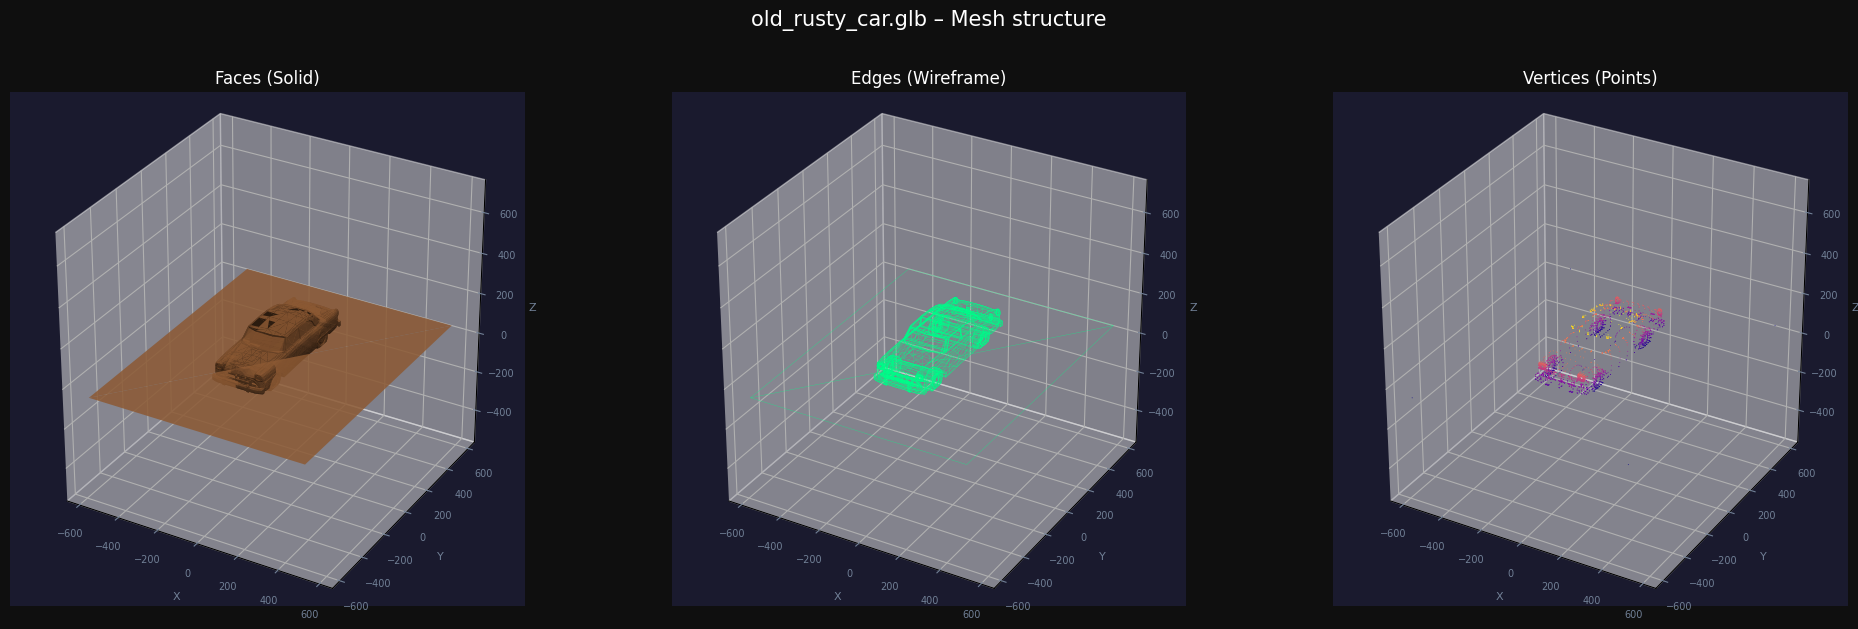

Saved: media/python_comparison_panel.png


In [16]:
fig = plt.figure(figsize=(20, 6))
FACE_SAMPLE  = 6000
EDGE_SAMPLE  = 10000
VERT_SAMPLE  = 8000

# --- 1. Solid ----------------------------------------------------------------
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Faces (Solid)', color='white', fontsize=12)
idx = np.random.choice(len(mesh.faces), min(FACE_SAMPLE, len(mesh.faces)), replace=False)
faces = mesh.vertices[mesh.faces[idx]]
normals = mesh.face_normals[idx]
bright = np.clip((normals[:, 2] + 1) / 2, 0.2, 1.0)
colors = np.column_stack([bright*0.55, bright*0.35, bright*0.20, np.ones(len(idx))*0.85])
ax1.add_collection3d(Poly3DCollection(faces, facecolors=colors, edgecolors='none'))
_set_ax_bounds(ax1, mesh)
ax1.set_xlabel('X', color='#718096', fontsize=8)
ax1.set_ylabel('Y', color='#718096', fontsize=8)
ax1.set_zlabel('Z', color='#718096', fontsize=8)

# --- 2. Wireframe ------------------------------------------------------------
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Edges (Wireframe)', color='white', fontsize=12)
edges = mesh.edges_unique
eidx = np.random.choice(len(edges), min(EDGE_SAMPLE, len(edges)), replace=False)
segs = mesh.vertices[edges[eidx]]
ax2.add_collection3d(Line3DCollection(segs, colors='#00ff88', linewidths=0.3, alpha=0.6))
_set_ax_bounds(ax2, mesh)
ax2.set_xlabel('X', color='#718096', fontsize=8)
ax2.set_ylabel('Y', color='#718096', fontsize=8)
ax2.set_zlabel('Z', color='#718096', fontsize=8)

# --- 3. Points ---------------------------------------------------------------
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Vertices (Points)', color='white', fontsize=12)
vidx = np.random.choice(len(mesh.vertices), min(VERT_SAMPLE, len(mesh.vertices)), replace=False)
v = mesh.vertices[vidx]
z_norm = (v[:, 2] - v[:, 2].min()) / (np.ptp(v[:, 2]) + 1e-8)
ax3.scatter(v[:, 0], v[:, 1], v[:, 2], c=plt.cm.plasma(z_norm), s=0.5, alpha=0.8, linewidths=0)
_set_ax_bounds(ax3, mesh)
ax3.set_xlabel('X', color='#718096', fontsize=8)
ax3.set_ylabel('Y', color='#718096', fontsize=8)
ax3.set_zlabel('Z', color='#718096', fontsize=8)

plt.suptitle('old_rusty_car.glb – Mesh structure', color='white', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../media/python_comparison_panel.png', dpi=120, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print('Saved: media/python_comparison_panel.png')

## 9. Export rotating GIF animation

In [18]:

from PIL import Image
import io

FRAMES   = 36   # one frame every 10° → full 360°
SAMPLE_F = 5000
SAMPLE_E = 6000
SAMPLE_V = 5000

# --- Prepare geometry samples ---
# Faces
fidx  = np.random.choice(len(mesh.faces), min(SAMPLE_F, len(mesh.faces)), replace=False)
faces = mesh.vertices[mesh.faces[fidx]]
normals = mesh.face_normals[fidx]
bright  = np.clip((normals[:, 2] + 1) / 2, 0.2, 1.0)
face_colors = np.column_stack([bright*0.55, bright*0.35, bright*0.20, np.ones(len(fidx))*0.75])

# Edges
edges = mesh.edges_unique
eidx  = np.random.choice(len(edges), min(SAMPLE_E, len(edges)), replace=False)
segs  = mesh.vertices[edges[eidx]]

# Vertices
vidx = np.random.choice(len(mesh.vertices), min(SAMPLE_V, len(mesh.vertices)), replace=False)
v    = mesh.vertices[vidx]
z_norm = (v[:, 2] - v[:, 2].min()) / (np.ptp(v[:, 2]) + 1e-8)
vert_colors = plt.cm.plasma(z_norm)

# --- Build figure ---
fig = plt.figure(figsize=(7, 6))
ax  = fig.add_subplot(111, projection='3d')
ax.set_title('Combined rotation', color='white', fontsize=11)

# Add all three layers
ax.add_collection3d(Poly3DCollection(faces, facecolors=face_colors, edgecolors='none'))
ax.add_collection3d(Line3DCollection(segs, colors='#00ff88', linewidths=0.25, alpha=0.45))
ax.scatter(v[:, 0], v[:, 1], v[:, 2], c=vert_colors, s=0.4, alpha=0.7, linewidths=0)

_set_ax_bounds(ax, mesh)
ax.set_axis_off()

# Capture frames
frames_pil = []
for angle in np.linspace(0, 360, FRAMES, endpoint=False):
    ax.view_init(elev=20, azim=angle)
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=80, bbox_inches='tight', facecolor='#0f0f0f')
    buf.seek(0)
    frames_pil.append(Image.open(buf).copy())

plt.close(fig)

gif_path = '../media/python_rotation.gif'
frames_pil[0].save(
    gif_path,
    save_all=True,
    append_images=frames_pil[1:],
    duration=80,
    loop=0
)
print(f'GIF saved: {gif_path}  ({FRAMES} frames)')


GIF saved: ../media/python_rotation.gif  (36 frames)
